In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 38A6-1C25

 Directory of C:\Users\Administrator\Documents\data science

29-03-2023  11:42    <DIR>          .
25-03-2023  18:29    <DIR>          ..
29-03-2023  11:41    <DIR>          .ipynb_checkpoints
29-03-2023  11:41            32,169 230327_practice_wine_Somenath_Mondal.ipynb
29-03-2023  11:41            34,415 230327_Shubhangi_Birajdar_Practice_wine_full.ipynb
29-03-2023  11:42           100,951 230327_winequality-red.csv
26-02-2023  19:40             4,295 assignments.ipynb
06-02-2023  19:59           103,983 BEML.csv
23-02-2023  10:21             3,527 Cars.csv
01-03-2023  22:12            29,822 claimants.csv
14-03-2023  23:20           250,018 clustering class 6.ipynb
25-03-2023  18:27                20 core python class 2 vs.py
28-03-2023  17:42           328,617 Decision Tree class 8 _C5.0_CART.ipynb
13-03-2023  09:58            11,336 fun-data.csv
06-02-2023  19:59           107,633 GLAXO.csv
30-01-2023  09:40        

In [3]:
import pandas as pd 

In [7]:
data=pd.read_csv("230327_winequality-red.csv")

In [8]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
data["quality"].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [65]:
data["quality"]=data["quality"]>5

In [55]:
#data["quality"]=data["quality"].map({4:0,8:0,3:0,5:1,6:2,7:0})

In [66]:
data["quality"].value_counts()



True     855
False    744
Name: quality, dtype: int64

In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler=MinMaxScaler()
new_featres=scaler.fit_transform(data.iloc[:,:-1])

In [68]:
new_featres

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.linear_model import LogisticRegression
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from  sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier





In [70]:
x_train,x_test,y_train,y_test=train_test_split(new_featres,data.iloc[:,-1],test_size=0.3)

In [71]:
y_test.value_counts()

True     266
False    214
Name: quality, dtype: int64

# Logistic Reg

In [72]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

       False       0.82      0.75      0.78       232
        True       0.79      0.84      0.81       248

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



# KNN

In [73]:
l=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    l.append(accuracy_score(pred,y_test))
    



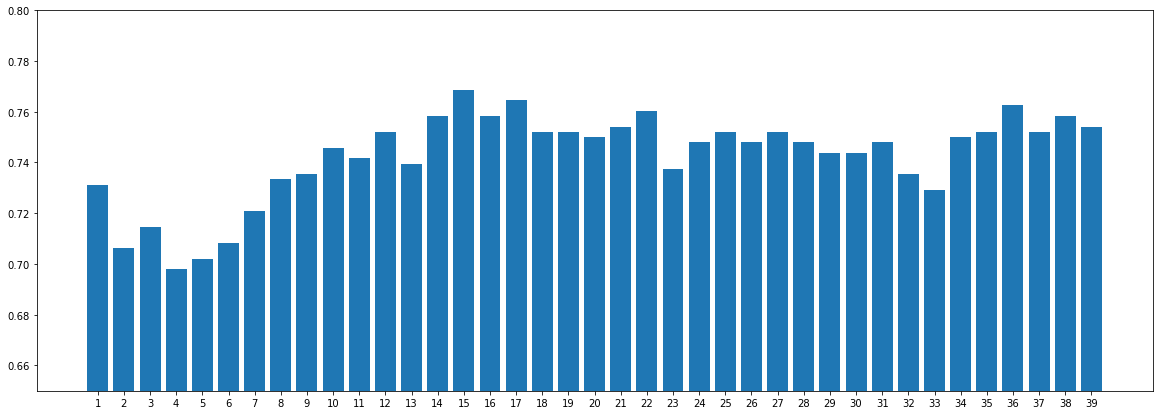

In [77]:
plt.figure(figsize=(20,7))
plt.bar(range(1,40),l)
plt.ylim(0.65,0.8)
plt.xticks(range(1,40))
plt.show()

# DT

In [78]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))



              precision    recall  f1-score   support

       False       0.71      0.70      0.71       220
        True       0.75      0.77      0.76       260

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



In [83]:
model=RandomForestClassifier(n_estimators=200,  )
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))



              precision    recall  f1-score   support

       False       0.80      0.78      0.79       218
        True       0.82      0.84      0.83       262

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



In [84]:
model=BaggingClassifier(n_estimators=200,  )
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))




              precision    recall  f1-score   support

       False       0.76      0.78      0.77       207
        True       0.83      0.81      0.82       273

    accuracy                           0.80       480
   macro avg       0.79      0.80      0.79       480
weighted avg       0.80      0.80      0.80       480



In [89]:
model=AdaBoostClassifier(n_estimators=200, learning_rate=0.05 )
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))




              precision    recall  f1-score   support

       False       0.78      0.75      0.76       224
        True       0.79      0.82      0.80       256

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480

